<a href="https://colab.research.google.com/github/E1N1K0/APPZE1N1K0/blob/main/2023_01_16_EJERCICIO_DINAMICA_ND_ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TAREA SMGdl**

---



**DATOS INICIALES**

In [1]:
# IMPORTAR LIBRERIAS
from sympy import *
import numpy as np

In [2]:
# DEFINICION DE SIMBOLOS
init_printing()

EI = symbols("EI")              #EI: Rigidez a la flexión.
L = symbols("L")                #L: Longitud.
rho = symbols("rho")            #rho: Densidad.
omega = symbols("omega")        #omega: Frecuencia natural.
lambd = symbols("lambda")       #omega^2.
u1,u2,u3 = symbols("u1,u2,u3")  #u1, u2, u3: Desplazamientos.
psi = symbols("psi")            #psi: Función de forma.
t = symbols("t")                #t: Tiempo.

In [3]:
# CIFRAS PERSONALIZADAS
"""Para determinar los ejercicios a desarrollar"""
C1 = 1
C2 = 0.89
C3 = 0.9
C4 = 1.1

estructuras = [f"Se evaluará la estructura numero {num}." for num in [
                1 if C1 % 2 == 0 else 2,
                3 if C2 % 2 == 0 else 4,
                5 if C3 % 2 == 0 else 6
                                        ]]

for estructura in estructuras:
    print(estructura)

Se evaluará la estructura numero 2.
Se evaluará la estructura numero 4.
Se evaluará la estructura numero 6.


**SOLUCION DEL EJERCICIO**

**DATOS DE ENTRADA PARA RESOLVER EL EJERCICIO**

In [4]:
#Definir la matriz de masa sin condensar y rigidez sin condensar,
#para el ejercicio que se desea resolver.

Ej = "5"   #<==== Definir el ejercicio a desarrollar.

if Ej == "1":
    M=Matrix([[rho*L/2,0,0],[0,0,0],[0,0,0]])
    K=Matrix([[12*EI/L**3, -6*EI/L**2, -6*EI/L**2],[-6*EI/L**2, 4*EI/L**1,2*EI/L**1],[-6*EI/L**2,2*EI/L**1, 12*EI/L**1]])

elif Ej == "2":
    M=Matrix([[rho*L/2,0,0],[0,0,0],[0,0,0]])
    K=Matrix([[12*EI/L**3, -6*EI/L**2, 0],[-6*EI/L**2, 12*EI/L**1,4*EI/L**1],[0,4*EI/L**1, 8*EI/L**1]])

elif Ej == "3":
    M=Matrix([[rho*L/2,0,0,0],[0,rho*L,0,0],[0,0,0,0],[0,0,0,0]])
    K=Matrix([[12*EI/(L**3), -12*EI/(L**3), -6*EI/(L**2), 0], [-12*EI/(L**3), 36*EI/(L**3), -6*EI/(L**2), -12*EI/(L**2)], [-6*EI/(L**2), -6*EI/(L**2), 12*EI/(L**1), 4*EI/(L**1)], [0, -12*EI/(L**2), 4*EI/(L**1), 8*EI/(L**1)]])

elif Ej == "4":
    M=Matrix([[rho*L/2,0,0,0],[0,rho*L/2,0,0],[0,0,0,0],[0,0,0,0]])
    K=Matrix([[24*EI/(L**3), 0, -12*EI/(L**2), 0], [0, 12*EI/(L**3), 6*EI/(L**2), 6*EI/(L**2)], [-12*EI/(L**2), 6*EI/(L**2), 12*EI/(L**1), 2*EI/(L**1)], [0, 6*EI/(L**2), 2*EI/(L**1), 4*EI/(L**1)]])

elif Ej == "5":
    M=Matrix([[3*rho*L,0,0],[0,2*rho*L,0],[0,0,0],[0,0,0]])
    K=Matrix([[96*EI/L**3, -24*EI/L**3, 18*EI/L**2],[-24*EI/L**3, 24*EI/L**3, 0],[18*EI/L**2,0, 12*EI/L**1]])

elif Ej == "6":
    M=Matrix([[5*rho*L/2,0,0],[0,rho*L/2,0],[0,0,0]])
    K=Matrix([[48*EI/L**3, -12*EI/L**3, 6*EI/L**2],[-12*EI/L**3, 12*EI/L**3, 0],[6*EI/L**2,0, 4*EI/L**1]])

elif Ej == "3x3":
    M = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    K = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

elif Ej == "4x4":
    M = Matrix([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])
    K = Matrix([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])

elif Ej == "libro":
    M=Matrix([[rho*L/4,0,0,0],[0,rho*L/2,0,0],[0,0,0,0],[0,0,0,0]])
    K = 4*EI/L**3*Matrix([[24, -24, -6*L, -6*L],[-24, 48, 6*L, 0],[-6*L, 6*L, 2*L**2, L**2],[-6*L, 0, L**2, 4*L**2]])

else:
    M = None
    K = None

In [5]:
#Matriz de masas sin condensar
M

⎡3⋅L⋅ρ    0    0⎤
⎢               ⎥
⎢  0    2⋅L⋅ρ  0⎥
⎢               ⎥
⎢  0      0    0⎥
⎢               ⎥
⎣  0      0    0⎦

In [6]:
#Matriz de Rigidez sin condensar
K

⎡ 96⋅EI   -24⋅EI   18⋅EI⎤
⎢ ─────   ───────  ─────⎥
⎢    3        3       2 ⎥
⎢   L        L       L  ⎥
⎢                       ⎥
⎢-24⋅EI    24⋅EI        ⎥
⎢───────   ─────     0  ⎥
⎢    3        3         ⎥
⎢   L        L          ⎥
⎢                       ⎥
⎢ 18⋅EI            12⋅EI⎥
⎢ ─────      0     ─────⎥
⎢    2               L  ⎥
⎣   L                   ⎦

**DESARROLLO:**

Se plantea la ecuación de equilibrio dinámico:

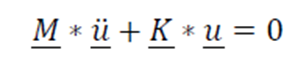

Se condensa, para simplificar la ecuación:

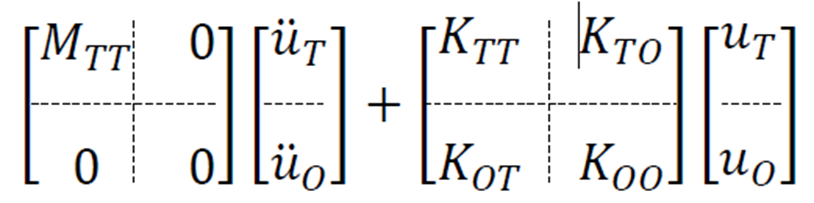

In [7]:
#Para automatizar el proceso, definir aceleraciones, u¨:
#segun criterio: Si no tiene masa la aceleracion es 0.
a = b = 1 if np.count_nonzero(M) == 1 else 2
print(f'Se reducirá a una matriz de {a,b}')

Se reducirá a una matriz de (2, 2)


In [8]:
#Submatriz de rigidez asociada a los gdl de desplazamiento
#Acceder a la submatriz en la esquina superior izquierda
Ktt= K[:a, :b]
Ktt

⎡ 96⋅EI   -24⋅EI ⎤
⎢ ─────   ───────⎥
⎢    3        3  ⎥
⎢   L        L   ⎥
⎢                ⎥
⎢-24⋅EI    24⋅EI ⎥
⎢───────   ───── ⎥
⎢    3        3  ⎥
⎣   L        L   ⎦

In [9]:
#Submatriz de rigidez asociada a los gdl de de desplazamiento y giro
#Acceder a la submatriz en la esquina inferior izquierda
Kot = K[a:, :b]
Kot

⎡18⋅EI   ⎤
⎢─────  0⎥
⎢   2    ⎥
⎣  L     ⎦

In [10]:
#Submatriz de rigidez asociada a los gdl de giro
# Acceder a la submatriz en la esquina inferior derecha
Koo = K[(a):, (b):]
Koo

⎡12⋅EI⎤
⎢─────⎥
⎣  L  ⎦

In [11]:
#Matriz de rigidez condensada
Kcond = Ktt - Kot.transpose()*Koo.inv()*Kot
Kcond

⎡ 69⋅EI   -24⋅EI ⎤
⎢ ─────   ───────⎥
⎢    3        3  ⎥
⎢   L        L   ⎥
⎢                ⎥
⎢-24⋅EI    24⋅EI ⎥
⎢───────   ───── ⎥
⎢    3        3  ⎥
⎣   L        L   ⎦

In [12]:
#Matriz de Masa condensada, Mcond=Mtt
#Submatriz de masa asociada a los gdl de traslación
#Acceder a la submatriz en la esquina superior izquierda
Mcond = M[:a, :b]
Mcond

⎡3⋅L⋅ρ    0  ⎤
⎢            ⎥
⎣  0    2⋅L⋅ρ⎦

In [13]:
#Obtención de giros, en función de los desplazamientos
#Definir un vector que contiene los desplazamientos
#Segun el tamaño de la matriz Mcond (a).
if a == 1:  #Solo u1.
    u = Matrix([[u1]])

else:  #u1 y u2.
    u = Matrix([[u1],[u2]])

u3 = -Koo.inv()*Kot*u
u3

⎡-3⋅u₁ ⎤
⎢──────⎥
⎣ 2⋅L  ⎦

In [62]:

#Esto se puede obviar.
#Polinomio característico de det[(Kcond-w^2*M)]=0
Pol = det(Kcond-lambd*Mcond)
Pol  #Con N() se muestra el resultado con decimales.


       2           4          8  2  2
1080⋅EI  - 210⋅EI⋅L ⋅λ⋅ρ + 6⋅L ⋅λ ⋅ρ 
─────────────────────────────────────
                   6                 
                  L                  

In [15]:

#Esto se puede obviar.
#Hallar lambd:
#Resolución del polinomio característico de det[(Kcond-w^2*M)]=0
#La solución son las frecuencias al cuadrado w^2 (lambd)
freqs=solve(Pol,lambd)
freqs


⎡EI⋅(35 - √505)  EI⋅(√505 + 35)⎤
⎢──────────────, ──────────────⎥
⎢       4               4      ⎥
⎣    2⋅L ⋅ρ          2⋅L ⋅ρ    ⎦

In [16]:

#Esto se puede obviar.
#Primera frecuencia al cuadrado
freq1=(freqs[0])
freq1


EI⋅(35 - √505)
──────────────
       4      
    2⋅L ⋅ρ    

In [17]:
#Primera frecuencia
w1=N((simplify(freqs[0]))**(1/2))
w1

                       0.5
                 ⎛ EI ⎞   
2.50277795117303⋅⎜────⎟   
                 ⎜ 4  ⎟   
                 ⎝L ⋅ρ⎠   

In [18]:

#Esto se puede obviar.
#Segunda frecuencia al cuadrado
if a != 1: #cuando se cumpla que a sea diferente de 1, se imprimirán los resultados
    freq2=simplify(freqs[1])
    freq2
else:
    freq2 = false
simplify(freq2)


EI⋅(√505 + 35)
──────────────
       4      
    2⋅L ⋅ρ    

In [19]:
#Esto se puede obviar.
#Segunda frecuencia
if a != 1: #cuando se cumpla que a sea diferente de 1, se imprimirán los resultados
    w2=N(freqs[1])**(1/2)
    freq2
else:
    w2 = false

w2

                       0.5
                 ⎛ EI ⎞   
5.36060654470388⋅⎜────⎟   
                 ⎜ 4  ⎟   
                 ⎝L ⋅ρ⎠   

Método alternativo de obtener las frecuencias de los modos:

Transformar para calcular las frecuencias como un problema de valores propios.

Resolver det[(Kcond * M^(-1)-w^2*I)]=0



In [20]:
#Maux es la matriz (Kcond*M^(-1)-w^2*I)
Maux = Mcond.inv()*Kcond
Maux

⎡ 23⋅EI   -8⋅EI ⎤
⎢ ─────   ──────⎥
⎢   4       4   ⎥
⎢  L ⋅ρ    L ⋅ρ ⎥
⎢               ⎥
⎢-12⋅EI   12⋅EI ⎥
⎢───────  ───── ⎥
⎢   4       4   ⎥
⎣  L ⋅ρ    L ⋅ρ ⎦

In [21]:

#De esta manera, el cálculo de fecuencias (valores propios), es más sencillo con el comando eigenvals()
#El resultado es un vector, donde en cada componente el primer valor es la frecuencia al cuadrado.
#El segundo (después de los :) es el número de veces que se repite
freqss=Maux.eigenvals()
freqss


⎧   ⎛35   √505⎞        ⎛√505   35⎞   ⎫
⎪EI⋅⎜── - ────⎟     EI⋅⎜──── + ──⎟   ⎪
⎪   ⎝2     2  ⎠        ⎝ 2     2 ⎠   ⎪
⎨──────────────: 1, ──────────────: 1⎬
⎪      4                  4          ⎪
⎪     L ⋅ρ               L ⋅ρ        ⎪
⎩                                    ⎭

In [22]:
#El cálculo de modos (valores propios), es más sencillo con el comando eigenvects()
#El resultado es un vector, donde en cada componente:
#El primer valor es la frecuencia al cuadrado.
#El segundo es el número de veces que se repite.
#El tercero es el vector propio.
Modes = Maux.eigenvects()
Modes

⎡⎛   ⎛35   √505⎞                    ⎞  ⎛   ⎛√505   35⎞                    ⎞⎤
⎢⎜EI⋅⎜── - ────⎟     ⎡⎡  11   √505⎤⎤⎟  ⎜EI⋅⎜──── + ──⎟     ⎡⎡  √505   11⎤⎤⎟⎥
⎢⎜   ⎝2     2  ⎠     ⎢⎢- ── + ────⎥⎥⎟  ⎜   ⎝ 2     2 ⎠     ⎢⎢- ──── - ──⎥⎥⎟⎥
⎢⎜──────────────, 1, ⎢⎢  24    24 ⎥⎥⎟, ⎜──────────────, 1, ⎢⎢   24    24⎥⎥⎟⎥
⎢⎜      4            ⎢⎢           ⎥⎥⎟  ⎜      4            ⎢⎢           ⎥⎥⎟⎥
⎣⎝     L ⋅ρ          ⎣⎣     1     ⎦⎦⎠  ⎝     L ⋅ρ          ⎣⎣     1     ⎦⎦⎠⎦

In [23]:
#Primera frecuencia al cuadrado
freq1=simplify(Modes[0][0])
freq1

EI⋅(35 - √505)
──────────────
       4      
    2⋅L ⋅ρ    

In [63]:
#Segunda frecuencia al cuadrado
if a != 1: #cuando se cumpla que a sea diferente de 1, se imprimirán los resultados
    freq2=simplify(Modes[1][0])
    freq2
else:
    freq2 = false
N(freq2)

28.7361025271221⋅EI
───────────────────
         4         
        L ⋅ρ       

In [25]:
#Guardamos el primer vector propio (asociado a la primera frecuencia) en la variable V1
V1 = Modes[0][2][0]
V1

⎡  11   √505⎤
⎢- ── + ────⎥
⎢  24    24 ⎥
⎢           ⎥
⎣     1     ⎦

In [26]:
#Como V1 no está normalizado a la primera componente, multiplicamos V1 por la inversa de la primera componente
V1 = V1*1.0/V1[0]
N(V1)

⎡      1.0       ⎤
⎢                ⎥
⎣2.09201281589026⎦

In [27]:
#Para obtener las componentes del vector de modos de vibración asociadas al giro,
#se utiliza la expresión de los giros u3, donde insertamos los valores de la primera y segunda componetes del vector
#Modo 1
#Segun el tamaño de la martiz M (a).
if a == 1:  #Solo u1.
    s=u3.subs([(u1,V1[0])])
else:  #u1 y u2.
    s=u3.subs([(u1,V1[0]),(u2,V1[1])])
simplify(s),Koo, Kot, N(V1)

⎛                ⎡18⋅EI   ⎤                    ⎞
⎜⎡-3 ⎤  ⎡12⋅EI⎤  ⎢─────  0⎥  ⎡      1.0       ⎤⎟
⎜⎢───⎥, ⎢─────⎥, ⎢   2    ⎥, ⎢                ⎥⎟
⎝⎣2⋅L⎦  ⎣  L  ⎦  ⎣  L     ⎦  ⎣2.09201281589026⎦⎠

In [28]:
#Guardamos el segundo vector propio (asociado a la segunda frecuencia) en la variable V2 (sera falso si la matriz es de 1x1)
if a != 1:  #Solo u1.
    V2 = Modes[1][2][0]
else:
    V2 = false
V2

⎡  √505   11⎤
⎢- ──── - ──⎥
⎢   24    24⎥
⎢           ⎥
⎣     1     ⎦

In [29]:
#Como V2 no está normalizado a la primera componente, multiplicamos V2 por la inversa de la primera componente
if a != 1:
    V2 = V2*1.0/V2[0]
else:
    V2 = false
V2

⎡     1     ⎤
⎢           ⎥
⎢     1     ⎥
⎢───────────⎥
⎢  √505   11⎥
⎢- ──── - ──⎥
⎣   24    24⎦

In [64]:
#Para obtener las componentes del vector de modos de vibración asociadas al giro,
#se utiliza la expresión de los giros u3, donde insertamos los valores de la primera y segunda componetes del vector
#modo 2
if a != 1:
    mvg = simplify(u3.subs([(u1,V2[0]),(u2,V2[1])]))
else:
    mvg = false

mvg,Koo, Kot, N(V2)

⎛                ⎡18⋅EI   ⎤                      ⎞
⎜⎡-3 ⎤  ⎡12⋅EI⎤  ⎢─────  0⎥  ⎡       1.0        ⎤⎟
⎜⎢───⎥, ⎢─────⎥, ⎢   2    ⎥, ⎢                  ⎥⎟
⎝⎣2⋅L⎦  ⎣  L  ⎦  ⎣  L     ⎦  ⎣-0.717012815890264⎦⎠

In [31]:
#Masa modal del modo 1
M1 = V1.transpose()*Mcond*V1
M1 = M1[0]

In [32]:
N(M1), V1

⎛                      ⎡     1     ⎤⎞
⎜                      ⎢           ⎥⎟
⎜                      ⎢     1     ⎥⎟
⎜11.7530352436982⋅L⋅ρ, ⎢───────────⎥⎟
⎜                      ⎢  11   √505⎥⎟
⎜                      ⎢- ── + ────⎥⎟
⎝                      ⎣  24    24 ⎦⎠

In [65]:
#Masa modal del modo 2
if a != 1:
    M2 = V2.transpose()*Mcond*V2
    M2 = M2[0]
else:
    M2 = false
N(M2),V2

⎛                      ⎡     1     ⎤⎞
⎜                      ⎢           ⎥⎟
⎜                      ⎢     1     ⎥⎟
⎜4.02821475630177⋅L⋅ρ, ⎢───────────⎥⎟
⎜                      ⎢  √505   11⎥⎟
⎜                      ⎢- ──── - ──⎥⎟
⎝                      ⎣   24    24⎦⎠

In [34]:
#Rigidez modal asociada al modo 1
K1 = V1.transpose()*Kcond*V1
K1 = K1[0]

In [35]:
N(K1)

73.619807761646⋅EI
──────────────────
         3        
        L         

In [66]:
#Rigidez modal asociada al modo 2
if a != 1:
    K2 = V2.transpose()*Kcond*V2
    K2 = K2[0]
else:
    K2 = false
N(K2)

115.755192238354⋅EI
───────────────────
          3        
         L         

In [37]:
#Comprobación de que los modos son ortogonales con respecto a la matriz de rigidez
if a == 1:  #Solo u1.
    pass
else:
    simplify(V1.transpose()*Kcond*V2)

In [38]:
#Comprobación de que los modos son ortogonales con respecto a la matriz de masas
if a != 1:
    simplify(V1.transpose()*Mcond*V2)

In [39]:
#Problema de vibraciones libres, condiciones iniciales
if a == 1:  #Solo u1.
    Uo = Matrix([[1]]) #Desplazamientos iniciales
    Vo = Matrix([[0]]) #Velocidades iniciales
else:
    Uo = Matrix([[1],[0]]) #Desplazamientos iniciales
    Vo = Matrix([[0],[0]]) #Velocidades iniciales

In [40]:
#Condicion inicial de desplazamiento asociada al modo 1
q1o = V1.transpose()*Mcond*Uo/M1
simplify(q1o)

⎡1   11⋅√505⎤
⎢─ - ───────⎥
⎣2     1010 ⎦

In [41]:
#Condicion inicial de desplazamiento asociada al modo 2
if a != 1:
    q2o=V2.transpose()*Mcond*Uo/M2
else:
    q2o=false
simplify(q2o)

⎡11⋅√505   1⎤
⎢─────── + ─⎥
⎣  1010    2⎦

In [42]:
#Condicion inicial de velocidad asociada al modo 1
qv1o=V1.transpose()*Mcond*Vo/M1
simplify(qv1o)

[0]

In [43]:
#Condicion inicial de velocidad asociada al modo 2
if a != 1:
    qv2o=V2.transpose()*Mcond*Vo/M2
else:
    qv2o=false
simplify(qv2o)

[0]

In [44]:
#Frecuencia del modo 1, es la raiz cuadrada de w1^2, también se calcula la frecuencia amortiguada
omega1  = sqrt(freq1)
omega1d = omega1*sqrt(1-psi**2)

#Respuesta del primer modo
q1 = exp(-psi*omega1*t)*(q1o*cos(omega1d*t)+(psi*q1o*omega1+qv1o)/omega1d*sin(omega1d*t))
simplify(q1)

⎡                                                                             
⎢                                                                             
⎢             ⎛     ⎛          ______    ________              ⎞              
⎢             ⎜     ⎜         ╱  EI     ╱      2    ___________⎟              
⎢             ⎜     ⎜√2⋅t⋅   ╱  ──── ⋅╲╱  1 - ψ  ⋅╲╱ 35 - √505 ⎟              
⎢             ⎜     ⎜       ╱    4                             ⎟      ________
⎢           2 ⎜     ⎜     ╲╱    L ⋅ρ                           ⎟     ╱      2 
⎢(11 - √505) ⋅⎜ψ⋅sin⎜──────────────────────────────────────────⎟ + ╲╱  1 - ψ  
⎢             ⎝     ⎝                    2                     ⎠              
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                    ________ 
⎢                                                                   ╱      2  
⎣                                                   

In [45]:
#Frecuencia del modo 2, es la raiz cuadrada de w1^2, también se calcula la frecuencia amortiguada
if a == 1:  #Solo u1.
    pass
else:
    omega2=sqrt(freq2)
    omega2d = omega2*sqrt(1-psi**2)
    #Respuesta del segundo modo
    q2=exp(-psi*omega2*t)*(q2o*cos(omega2d*t)+(psi*q2o*omega2+qv2o)/omega2d*sin(omega2d*t))
    simplify(q2)

In [46]:
#Respuesta total, suma de las respuestas de los modos (ver principio de descomposicón modal)
if a == 1:  #Solo u1.
    u = V1*q1
else:
    u = V1*q1 + V2*q2
simplify(u)

⎡ ⎛                                                                           
⎢ ⎜                                                                           
⎢ ⎜                                  ⎛     ⎛          ______    ________      
⎢ ⎜                                  ⎜     ⎜         ╱  EI     ╱      2    ___
⎢ ⎜                                  ⎜     ⎜√2⋅t⋅   ╱  ──── ⋅╲╱  1 - ψ  ⋅╲╱ 35
⎢ ⎜                                  ⎜     ⎜       ╱    4                     
⎢ ⎜           2 ⎛                 2⎞ ⎜     ⎜     ╲╱    L ⋅ρ                   
⎢ ⎜(11 - √505) ⋅⎝384 + (11 + √505) ⎠⋅⎜ψ⋅sin⎜──────────────────────────────────
⎢ ⎝                                  ⎝     ⎝                    2             
⎢ ────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                   

In [47]:
#En la fórmula, se ingresan los valores de parámetros:
val_ini =     {EI:1,
               psi:0.1,
               L:1,
               rho:1,
               t:t}
val_ini

{EI: 1, L: 1, ψ: 0.1, ρ: 1, t: t}

In [48]:
#Evaluamos numéricamente la fórmula
u.subs(val_ini)

⎡⎛                     ⎛                        ___________⎞        ⎛         
⎢⎜0.301511344577764⋅sin⎝0.49749371855331⋅√2⋅t⋅╲╱ 35 - √505 ⎠   3⋅cos⎝0.4974937
⎢⎜────────────────────────────────────────────────────────── + ───────────────
⎢⎜                              2                                             
⎢⎜                    3 + ──────────────                                   3 +
⎢⎜                                     2                                      
⎢⎜                        ⎛  11   √505⎞                                       
⎢⎜                        ⎜- ── + ────⎟                                       
⎢⎝                        ⎝  24    24 ⎠                                       
⎢                                                                             
⎢⎛                     ⎛                        ___________⎞        ⎛         
⎢⎜0.301511344577764⋅sin⎝0.49749371855331⋅√2⋅t⋅╲╱ 35 - √505 ⎠   3⋅cos⎝0.4974937
⎢⎜──────────────────────────────────────────────────

**GRAFICA DE LA SOLUCION**

In [49]:
#Importar librerias para generar la gráfica de la solución
%matplotlib inline
import matplotlib.pyplot as plt

In [50]:
#Grafica de la solución del primer gdl
#de t=0 a t=50s, cada 0.1s
t_vec  = np.arange(0, 50, 0.1)
if a == 1:  #Solo u1.
    u_vec1 = np.array([N(u[0].subs({EI:1,psi:0.1,L:1,rho:1,t:tt})) for tt in t_vec])
    u_vec2 = false
else:
    u_vec1 = np.array([N(u[0].subs({EI:1,psi:0.1,L:1,rho:1,t:tt})) for tt in t_vec])
    u_vec2 = np.array([N(u[1].subs({EI:1,psi:0.1,L:1,rho:1,t:tt})) for tt in t_vec])

In [51]:
u_vec1

array([1.00000000000000, 0.891328422416935, 0.606956509013229,
       0.235010283379679, -0.124517099320961, -0.386974771142347,
       -0.503331196327020, -0.468874939703875, -0.319247165249031,
       -0.116192391191714, 0.0720984775087806, 0.190242912994891,
       0.209415781394675, 0.132482254155549, -0.00997746008862487,
       -0.170760964545273, -0.300563692517236, -0.361691827347277,
       -0.337373496753577, -0.234606517901248, -0.0804086402609161,
       0.0868943009302490, 0.228550441035998, 0.315344397964630,
       0.334103506792194, 0.289381748789000, 0.200369945507917,
       0.0943386185456450, -0.00129726838504100, -0.0660542346618902,
       -0.0908203683782775, -0.0787683884349940, -0.0428813875909774,
       -0.00111832072303931, 0.0292312898199230, 0.0363982390537860,
       0.0169630499677019, -0.0238961531928374, -0.0745486239371224,
       -0.120637479657090, -0.149232937160985, -0.152256652771176,
       -0.128328842652729, -0.0826925111025171, -0.02541366851

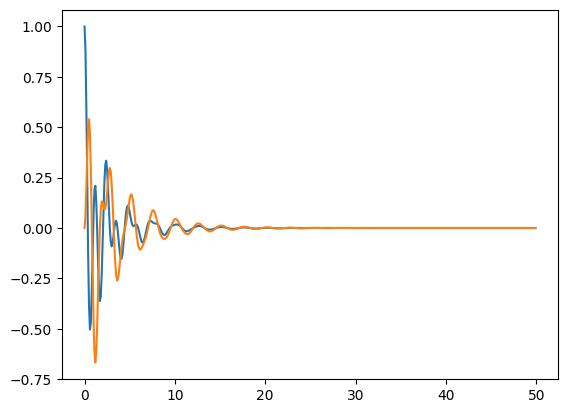

In [52]:
if a == 1:  #Solo u1.
    plt.plot(t_vec, u_vec1);
    plt.show()
else:
    plt.plot(t_vec, u_vec1);
    plt.plot(t_vec, u_vec2);
    plt.show()

In [53]:
#Respuesta en velocidad (derivada del desplazamiento con respecto al tiempo)
v = diff(u,t)
v

⎡                                 ⎛           ⎛          ______    ________   
⎢                                 ⎜           ⎜         ╱  EI     ╱      2    
⎢                                 ⎜           ⎜√2⋅t⋅   ╱  ──── ⋅╲╱  1 - ψ  ⋅╲╱
⎢                                 ⎜           ⎜       ╱    4                  
⎢                                 ⎜           ⎜     ╲╱    L ⋅ρ                
⎢            ______               ⎜3⋅L⋅ψ⋅ρ⋅sin⎜───────────────────────────────
⎢           ╱  EI     ___________ ⎜           ⎝                    2          
⎢  √2⋅ψ⋅   ╱  ──── ⋅╲╱ 35 - √505 ⋅⎜───────────────────────────────────────────
⎢         ╱    4                  ⎜             ________                      
⎢       ╲╱    L ⋅ρ                ⎜            ╱      2  ⎛            2⋅L⋅ρ   
⎢                                 ⎜          ╲╱  1 - ψ  ⋅⎜3⋅L⋅ρ + ────────────
⎢                                 ⎜                      ⎜                    
⎢                                 ⎜                 

In [54]:
#Grafica de la solución del primer gdl
t_vec  = np.arange(0, 50, 0.1)
if a == 1:  #Solo u1.
    v_vec1 = np.array([N(v[0].subs({EI:1,psi:0.1,L:1,rho:1,t:tt})) for tt in t_vec])
    v_vec2 = false
else:
    v_vec1 = np.array([N(v[0].subs({EI:1,psi:0.1,L:1,rho:1,t:tt})) for tt in t_vec])
    v_vec2 = np.array([N(v[1].subs({EI:1,psi:0.1,L:1,rho:1,t:tt})) for tt in t_vec])

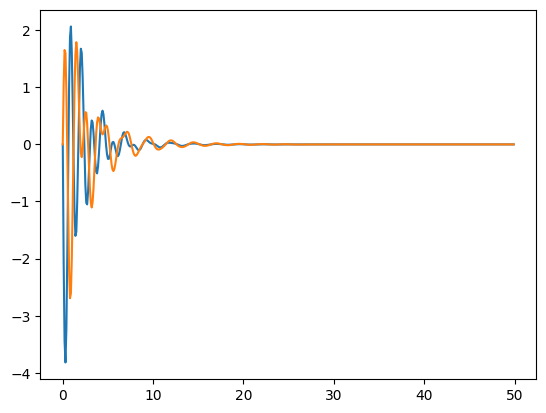

In [55]:
if a == 1:  #Solo u1.
    plt.plot(t_vec, v_vec1);
    plt.show()
else:
    plt.plot(t_vec, v_vec1);
    plt.plot(t_vec, v_vec2);
    plt.show()

In [56]:
#Respuesta bajo una carga armónica aplicada en el gdl 1
if a == 1:  #Solo u1.
    p=Matrix([[cos(omega*t)]])
else:
    p=Matrix([[cos(omega*t)],[0]])
p

⎡cos(ω⋅t)⎤
⎢        ⎥
⎣   0    ⎦

In [57]:
#Carga asociada al primer modo
p1=V1.transpose()*p
p1=p1[0]
simplify(p1)

cos(ω⋅t)

In [58]:
#Carga asociada al segundo modo
if a != 1:
    p2=V2.transpose()*p
    p2=p2[0]
else:
    p2 = false
simplify(p2)

cos(ω⋅t)

In [59]:
#Respuesta del primer modo
omega1=sqrt(freq1)
omega1d = omega1*sqrt(1-psi**2)
beta1=omega/omega1
p1a=p1/cos(omega*t)
q1=p1a/K1*((1-beta1**2)/((1-beta1**2)**2+(2*psi*beta1)**2)*sin(omega*t)-2*psi*beta1/((1-beta1**2)**2+(2*psi*beta1)**2)*cos(omega*t))
q1=simplify(q1)
q1

                   ⎛                                             ______       
    3            2 ⎜                         7/2                ╱  EI         
   L ⋅(11 - √505) ⋅⎜- 2⋅√2⋅EI⋅ω⋅ψ⋅(35 - √505)   ⋅cos(ω⋅t) +    ╱  ──── ⋅(35 - 
                   ⎜                                          ╱    4          
                   ⎝                                        ╲╱    L ⋅ρ        
──────────────────────────────────────────────────────────────────────────────
       ______              ⎛                                                  
      ╱  EI              2 ⎜      4  2  2                 ⎛                   
3⋅   ╱  ──── ⋅(35 - √505) ⋅⎝8⋅EI⋅L ⋅ω ⋅ψ ⋅ρ⋅(35 - √505) + ⎝EI⋅(35 - √505) - 2⋅
    ╱    4                                                                    
  ╲╱    L ⋅ρ                                                                  

                                            ⎞  
     3 ⎛                    4  2  ⎞         ⎟  
√505) ⋅⎝EI⋅(35 - √505) - 2⋅L ⋅ω ⋅ρ

In [60]:
if a != 1:
    omega2=sqrt(freq2)
    omega2d = omega2*sqrt(1-psi**2)
    beta2=omega/omega2
    p2a=p2/cos(omega*t)
    q2=p2a/K2*((1-beta2**2)/((1-beta2**2)**2+(2*psi*beta2)**2)*sin(omega*t)-2*psi*beta2/((1-beta2**2)**2+(2*psi*beta2)**2)*cos(omega*t))
else:
    q2 = false
simplify(q2)

                  ⎛                                             ______        
   3            2 ⎜                         7/2                ╱  EI          
  L ⋅(11 + √505) ⋅⎜- 2⋅√2⋅EI⋅ω⋅ψ⋅(√505 + 35)   ⋅cos(ω⋅t) +    ╱  ──── ⋅(√505 +
                  ⎜                                          ╱    4           
                  ⎝                                        ╲╱    L ⋅ρ         
──────────────────────────────────────────────────────────────────────────────
       ______              ⎛                                                  
      ╱  EI              2 ⎜      4  2  2                 ⎛                   
3⋅   ╱  ──── ⋅(√505 + 35) ⋅⎝8⋅EI⋅L ⋅ω ⋅ψ ⋅ρ⋅(√505 + 35) + ⎝EI⋅(√505 + 35) - 2⋅
    ╱    4                                                                    
  ╲╱    L ⋅ρ                                                                  

                                           ⎞  
    3 ⎛                    4  2  ⎞         ⎟  
 35) ⋅⎝EI⋅(√505 + 35) - 2⋅L ⋅ω ⋅ρ⎠⋅s

In [61]:
if a != 1:
    u = V1*q1+V2*q2
else:
    u = V1*q1
simplify(u)

KeyboardInterrupt: 

In [ ]:
N(u.subs({EI:1,psi:0.1,L:1,rho:1,omega:10}))

In [ ]:
t_vec = np.arange(0, 3, 0.01)
if a == 1:  #Solo u1.
    u_vec1 = np.array([N(u[0].subs({EI:1,psi:0.1,L:1,rho:1,omega:10,t:tt})) for tt in t_vec])
else:
    u_vec1 = np.array([N(u[0].subs({EI:1,psi:0.1,L:1,rho:1,omega:10,t:tt})) for tt in t_vec])
    u_vec2 = np.array([N(u[1].subs({EI:1,psi:0.1,L:1,rho:1,omega:10,t:tt})) for tt in t_vec])

In [ ]:
if a == 1:  #Solo u1.
    plt.plot(t_vec, u_vec1);
    plt.show()
else:
    plt.plot(t_vec, u_vec1);
    plt.plot(t_vec, u_vec2);
    plt.show()